
 #  Data-Driven Fraud Prevention in Medical Insurance Systems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

### Reading the data into Data Frame

In [2]:
Train=pd.read_csv(r"Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv(r"Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv(r"Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv(r"Train_Outpatientdata-1542865627584.csv")

In [3]:
Train

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


In [4]:
Train_Beneficiarydata

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [5]:
Train_Inpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Train_Outpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### Merging OutPatient ,Inpatient and Beneficiary

In [7]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [8]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

## Data Preprocessing

In [9]:
Train_Allpatientdata

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,2,1,2,2,2,0,0,120,30
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,2,1,2,2,2,0,0,120,30
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,2,1,1,2,1,0,0,2530,540
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,2,1,1,2,1,0,0,2530,540
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,2,1,1,2,1,0,0,2530,540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,...,2,1,1,1,2,2,0,0,1270,690
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,...,2,1,1,1,2,2,0,0,1270,690
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,...,2,1,1,1,2,2,0,0,1270,690
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,...,2,1,1,1,2,2,0,0,1270,690


In [10]:
df=pd.merge(Train_Allpatientdata,Train,on='Provider')

In [11]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,1,1,2,1,0,0,2530,540,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,...,1,1,1,2,2,0,0,1270,690,No
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,...,1,1,1,2,2,0,0,1270,690,No
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,...,1,1,1,2,2,0,0,1270,690,No
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,...,1,1,1,2,2,0,0,1270,690,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [13]:
df1=df

In [14]:
df1

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE100000,CLM126832,2009-01-08,2009-01-08,PRV57172,50,PHY383401,NaN,NaN,79678,...,2,1,2,2,2,0,0,120,30,Yes
1,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,71656,...,2,1,2,2,2,0,0,120,30,Yes
2,BENE100001,CLM229075,2009-03-05,2009-03-05,PRV55158,70,PHY383478,NaN,NaN,64881,...,2,1,1,2,1,0,0,2530,540,No
3,BENE100001,CLM258631,2009-03-21,2009-03-21,PRV54966,70,PHY347511,NaN,NaN,36401,...,2,1,1,2,1,0,0,2530,540,Yes
4,BENE100001,CLM332544,2009-04-30,2009-05-02,PRV54890,90,PHY343317,PHY408367,PHY408367,2948,...,2,1,1,2,1,0,0,2530,540,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE99999,CLM359214,2009-05-14,2009-05-14,PRV55826,80,PHY341548,NaN,NaN,V7282,...,1,1,1,2,2,0,0,1270,690,No
558207,BENE99999,CLM475422,2009-07-17,2009-07-17,PRV54670,80,PHY351000,NaN,NaN,V103,...,1,1,1,2,2,0,0,1270,690,No
558208,BENE99999,CLM591853,2009-09-21,2009-09-21,PRV57336,30,PHY422310,PHY363262,NaN,185,...,1,1,1,2,2,0,0,1270,690,No
558209,BENE99999,CLM712394,2009-12-03,2009-12-03,PRV51690,700,PHY379564,NaN,NaN,71690,...,1,1,1,2,2,0,0,1270,690,No


In [15]:
import pandas as pd

# Assuming you already have the DataFrame 'df' containing the claims data

# Get unique provider values
unique_providers = df1['Provider'].unique()

# Create a DataFrame for provider mapping
provider_mapping_df = pd.DataFrame({'Provider_ID': range(1, len(unique_providers)+1),
                                    'Provider': unique_providers})

# Save the provider mapping DataFrame into a CSV file
provider_mapping_df.to_csv('provider_mapping.csv', index=False)


In [16]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Get unique attending physician values
unique_physicians = df1['AttendingPhysician'].unique()

# Create a DataFrame for physician mapping
physician_mapping_df = pd.DataFrame({'Physician_ID': range(1, len(unique_physicians)+1),
                                     'AttendingPhysician': unique_physicians})

# Save the physician mapping DataFrame into a CSV file
physician_mapping_df.to_csv('attennding_physician_mapping.csv', index=False)


In [17]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Get unique operating physician values
unique_operating_physicians = df1['OperatingPhysician'].dropna().unique()

# Create a DataFrame for operating physician mapping
operating_physician_mapping_df = pd.DataFrame({'OperatingPhysician_ID': range(1, len(unique_operating_physicians)+1),
                                               'OperatingPhysician': unique_operating_physicians})

# Save the operating physician mapping DataFrame into a CSV file
operating_physician_mapping_df.to_csv('operating_physician_mapping.csv', index=False)


In [18]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Columns containing diagnosis codes
diagnosis_code_columns = ['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
                          'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
                          'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9']

# Columns containing physician names
physician_columns = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Initialize an empty dictionary to store mappings
mappings = {}

# Iterate over the diagnosis code columns
for column in diagnosis_code_columns:
    # Get unique values for the current column
    unique_values = df1[column].dropna().unique()
    
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({f'{column}_ID': range(1, len(unique_values)+1),
                               column: unique_values})
    
    # Save the mapping DataFrame into a CSV file
    mapping_df.to_csv(f'{column}_mapping.csv', index=False)
    
    # Store the mapping DataFrame in the dictionary
    mappings[column] = mapping_df

# Iterate over the physician columns
for column in physician_columns:
    # Get unique values for the current column
    unique_values = df1[column].dropna().unique()
    
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({f'{column}_ID': range(1, len(unique_values)+1),
                               column: unique_values})
    
    # Save the mapping DataFrame into a CSV file
    mapping_df.to_csv(f'{column}_mapping.csv', index=False)
    
    # Store the mapping DataFrame in the dictionary
    mappings[column] = mapping_df

# Optionally, you can also store all mappings in a single dictionary or list
# for further processing if needed.
# all_mappings = mappings.values()


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

In [20]:
import pandas as pd

# Assuming you already have the DataFrame 'df1' containing the claims data

# Columns to drop
columns_to_drop = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 
                   'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
                   'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 
                   'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 
                   'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 
                   'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 
                   'ClmProcedureCode_6', 'AdmissionDt', 'DischargeDt']

# Drop specified columns
df = df1.drop(columns=columns_to_drop)

# Columns containing physician names
physician_columns = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Initialize an empty dictionary to store mappings
mappings = {}

# Iterate over the physician columns
for column in physician_columns:
    # Get unique values for the current column
    unique_values = df[column].dropna().unique()
    
    # Create a mapping DataFrame
    mapping_df = pd.DataFrame({f'{column}_ID': range(1, len(unique_values)+1),
                               column: unique_values})
    
    # Save the mapping DataFrame into a CSV file
    mapping_df.to_csv(f'{column}_mapping.csv', index=False)
    
    # Store the mapping DataFrame in the dictionary
    mappings[column] = mapping_df

# Optionally, you can also store all mappings in a single dictionary or list
# for further processing if needed.
# all_mappings = mappings.values()


In [21]:
df

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,DOB,DOD,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,PRV57172,50,PHY383401,NaN,NaN,0.0,NaN,NaN,1938-03-01,NaN,...,2,1,2,2,2,0,0,120,30,Yes
1,PRV57172,70,PHY370909,NaN,PHY363377,0.0,NaN,NaN,1938-03-01,NaN,...,2,1,2,2,2,0,0,120,30,Yes
2,PRV55158,70,PHY383478,NaN,NaN,0.0,64880,NaN,1939-08-01,NaN,...,2,1,1,2,1,0,0,2530,540,No
3,PRV54966,70,PHY347511,NaN,NaN,0.0,36401,NaN,1939-08-01,NaN,...,2,1,1,2,1,0,0,2530,540,Yes
4,PRV54890,90,PHY343317,PHY408367,PHY408367,0.0,78009,NaN,1939-08-01,NaN,...,2,1,1,2,1,0,0,2530,540,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV55826,80,PHY341548,NaN,NaN,0.0,V7283,NaN,1936-05-01,NaN,...,1,1,1,2,2,0,0,1270,690,No
558207,PRV54670,80,PHY351000,NaN,NaN,0.0,NaN,NaN,1936-05-01,NaN,...,1,1,1,2,2,0,0,1270,690,No
558208,PRV57336,30,PHY422310,PHY363262,NaN,0.0,NaN,NaN,1936-05-01,NaN,...,1,1,1,2,2,0,0,1270,690,No
558209,PRV51690,700,PHY379564,NaN,NaN,0.0,78720,NaN,1936-05-01,NaN,...,1,1,1,2,2,0,0,1270,690,No


In [22]:

# Columns containing mappings
columns_to_map = ['Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Dictionary to store mappings
mappings = {}

# Iterate over columns to map
for column in columns_to_map:
    # Load the mapping CSV file
    mapping_df = pd.read_csv(f'{column}_mapping.csv')
    
    # Create a dictionary from the mapping DataFrame
    mapping = dict(zip(mapping_df[column], mapping_df[f'{column}_ID']))
    
    # Map the values in the DataFrame column using the mapping dictionary
    df[f'{column}_ID'] = df[column].map(mapping)
    
    # Store the mapping in the mappings dictionary
    mappings[column] = mapping

In [23]:
df

,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,DOB,DOD,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID
0,PRV57172,50,PHY383401,NaN,NaN,0.0,NaN,NaN,1938-03-01,NaN,...,2,0,0,120,30,Yes,1,1.0,NaN,NaN
1,PRV57172,70,PHY370909,NaN,PHY363377,0.0,NaN,NaN,1938-03-01,NaN,...,2,0,0,120,30,Yes,1,2.0,NaN,1.0
2,PRV55158,70,PHY383478,NaN,NaN,0.0,64880,NaN,1939-08-01,NaN,...,1,0,0,2530,540,No,2,3.0,NaN,NaN
3,PRV54966,70,PHY347511,NaN,NaN,0.0,36401,NaN,1939-08-01,NaN,...,1,0,0,2530,540,Yes,3,4.0,NaN,NaN
4,PRV54890,90,PHY343317,PHY408367,PHY408367,0.0,78009,NaN,1939-08-01,NaN,...,1,0,0,2530,540,No,4,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,PRV55826,80,PHY341548,NaN,NaN,0.0,V7283,NaN,1936-05-01,NaN,...,2,0,0,1270,690,No,3684,57813.0,NaN,NaN
558207,PRV54670,80,PHY351000,NaN,NaN,0.0,NaN,NaN,1936-05-01,NaN,...,2,0,0,1270,690,No,1076,21485.0,NaN,NaN
558208,PRV57336,30,PHY422310,PHY363262,NaN,0.0,NaN,NaN,1936-05-01,NaN,...,2,0,0,1270,690,No,928,82063.0,35315.0,NaN
558209,PRV51690,700,PHY379564,NaN,NaN,0.0,78720,NaN,1936-05-01,NaN,...,2,0,0,1270,690,No,2080,10354.0,NaN,NaN


In [24]:
# Columns to drop
columns_to_drop = ['Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [25]:
df

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,...,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID
0,50,0.0,NaN,NaN,1938-03-01,NaN,1,1,0,49,...,2,0,0,120,30,Yes,1,1.0,NaN,NaN
1,70,0.0,NaN,NaN,1938-03-01,NaN,1,1,0,49,...,2,0,0,120,30,Yes,1,2.0,NaN,1.0
2,70,0.0,64880,NaN,1939-08-01,NaN,1,1,0,33,...,1,0,0,2530,540,No,2,3.0,NaN,NaN
3,70,0.0,36401,NaN,1939-08-01,NaN,1,1,0,33,...,1,0,0,2530,540,Yes,3,4.0,NaN,NaN
4,90,0.0,78009,NaN,1939-08-01,NaN,1,1,0,33,...,1,0,0,2530,540,No,4,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,80,0.0,V7283,NaN,1936-05-01,NaN,2,1,0,29,...,2,0,0,1270,690,No,3684,57813.0,NaN,NaN
558207,80,0.0,NaN,NaN,1936-05-01,NaN,2,1,0,29,...,2,0,0,1270,690,No,1076,21485.0,NaN,NaN
558208,30,0.0,NaN,NaN,1936-05-01,NaN,2,1,0,29,...,2,0,0,1270,690,No,928,82063.0,35315.0,NaN
558209,700,0.0,78720,NaN,1936-05-01,NaN,2,1,0,29,...,2,0,0,1270,690,No,2080,10354.0,NaN,NaN


In [26]:
import pandas as pd

# Extract year of birth from 'DOB' column
df['YearOfBirth'] = pd.to_datetime(df['DOB']).dt.year

# Extract year of death from 'DOD' column
df['YearOfDeath'] = pd.to_datetime(df['DOD']).dt.year

# Drop 'DOB' and 'DOD' columns
df.drop(columns=['DOB', 'DOD'], inplace=True)

# Save the updated DataFrame
df.to_csv('updated_claims_data.csv', index=False)


In [27]:
# Columns to drop
columns_to_drop = ['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'RenalDiseaseIndicator']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [28]:
df

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID,YearOfBirth,YearOfDeath
0,50,0.0,1,1,49,430,12,12,2,2,...,0,120,30,Yes,1,1.0,NaN,NaN,1938,NaN
1,70,0.0,1,1,49,430,12,12,2,2,...,0,120,30,Yes,1,2.0,NaN,1.0,1938,NaN
2,70,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,No,2,3.0,NaN,NaN,1939,NaN
3,70,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,Yes,3,4.0,NaN,NaN,1939,NaN
4,90,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,No,4,5.0,1.0,2.0,1939,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,80,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,No,3684,57813.0,NaN,NaN,1936,NaN
558207,80,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,No,1076,21485.0,NaN,NaN,1936,NaN
558208,30,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,No,928,82063.0,35315.0,NaN,1936,NaN
558209,700,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,No,2080,10354.0,NaN,NaN,1936,NaN


In [29]:
# Replace 'Yes' with 1 and 'No' with 0 in the 'PotentialFraud' column
df['PotentialFraud'] = df['PotentialFraud'].replace({'Yes': 1, 'No': 0})


C:\Users\urksr\AppData\Local\Temp\ipykernel_26240\3086903574.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PotentialFraud'] = df['PotentialFraud'].replace({'Yes': 1, 'No': 0})


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                557312 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [31]:
import pandas as pd

# Load the DataFrame containing the claims data
# Find null values in the DataFrame
null_values = df.isnull().sum()

# Print the columns with null values
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
DeductibleAmtPaid           899
AttendingPhysician_ID      1508
OperatingPhysician_ID    443764
OtherPhysician_ID        358475
YearOfDeath              554080
dtype: int64


In [32]:

# Replace null values with 0
df.fillna(0, inplace=True)

In [33]:
df

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID,YearOfBirth,YearOfDeath
0,50,0.0,1,1,49,430,12,12,2,2,...,0,120,30,1,1,1.0,0.0,0.0,1938,0.0
1,70,0.0,1,1,49,430,12,12,2,2,...,0,120,30,1,1,2.0,0.0,1.0,1938,0.0
2,70,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,0,2,3.0,0.0,0.0,1939,0.0
3,70,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,1,3,4.0,0.0,0.0,1939,0.0
4,90,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,0,4,5.0,1.0,2.0,1939,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,80,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,0,3684,57813.0,0.0,0.0,1936,0.0
558207,80,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,0,1076,21485.0,0.0,0.0,1936,0.0
558208,30,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,0,928,82063.0,35315.0,0.0,1936,0.0
558209,700,0.0,2,1,29,150,12,12,2,2,...,0,1270,690,0,2080,10354.0,0.0,0.0,1936,0.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                558211 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [35]:
# Get unique values for each column
unique_values = {}
for column in data.columns:
    unique_values[column] = data[column].unique()

# Display unique values for each column
for column, values in unique_values.items():
    print(f'Unique values for column {column}:')
    print(values)
    print()

NameError: name 'data' is not defined

In [102]:
# Get number of unique values for each column
unique_counts = {}
for column in data.columns:
    unique_counts[column] = len(data[column].unique())

# Display number of unique values for each column
for column, count in unique_counts.items():
    print(f'Number of unique values for column {column}: {count}')

Number of unique values for column InscClaimAmtReimbursed: 438
Number of unique values for column DeductibleAmtPaid: 17
Number of unique values for column Gender: 2
Number of unique values for column Race: 4
Number of unique values for column State: 52
Number of unique values for column County: 314
Number of unique values for column NoOfMonths_PartACov: 13
Number of unique values for column NoOfMonths_PartBCov: 13
Number of unique values for column ChronicCond_Alzheimer: 2
Number of unique values for column ChronicCond_Heartfailure: 2
Number of unique values for column ChronicCond_KidneyDisease: 2
Number of unique values for column ChronicCond_Cancer: 2
Number of unique values for column ChronicCond_ObstrPulmonary: 2
Number of unique values for column ChronicCond_Depression: 2
Number of unique values for column ChronicCond_Diabetes: 2
Number of unique values for column ChronicCond_IschemicHeart: 2
Number of unique values for column ChronicCond_Osteoporasis: 2
Number of unique values fo

In [36]:
data=df

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   InscClaimAmtReimbursed           558211 non-null  int64  
 1   DeductibleAmtPaid                558211 non-null  float64
 2   Gender                           558211 non-null  int64  
 3   Race                             558211 non-null  int64  
 4   State                            558211 non-null  int64  
 5   County                           558211 non-null  int64  
 6   NoOfMonths_PartACov              558211 non-null  int64  
 7   NoOfMonths_PartBCov              558211 non-null  int64  
 8   ChronicCond_Alzheimer            558211 non-null  int64  
 9   ChronicCond_Heartfailure         558211 non-null  int64  
 10  ChronicCond_KidneyDisease        558211 non-null  int64  
 11  ChronicCond_Cancer               558211 non-null  int64  
 12  Ch

In [38]:
# One-hot encode categorical variables
#data = pd.get_dummies(data, columns=['Provider', 'AttendingPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2'])


In [39]:
data['Race'].unique()

array([1, 2, 3, 5])

## MODELS
# 1.Logistic Regression
# 2.xgboost
# 3.catboost

## Logestic regression

e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 1, Loss: 0.5707088092297591


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 2, Loss: 0.5707088092297591


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 3, Loss: 0.5707088092297591


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 4, Loss: 0.5707088092297591


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 5, Loss: 0.5707088092297591


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 6, Loss: 0.5707088092297591


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Epoch 7, Loss: 0.5707088092297591
Accuracy: 0.6979389661689492


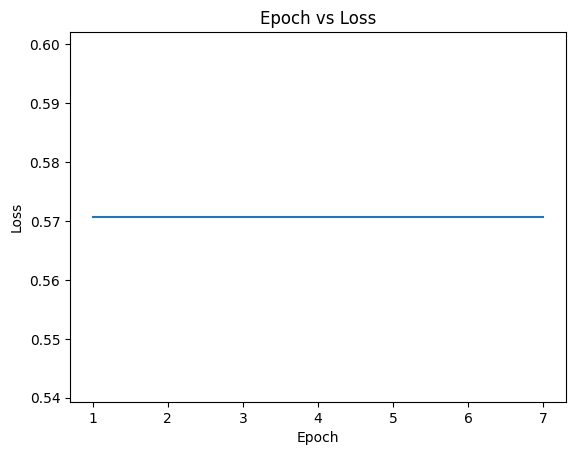

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss

# Assuming 'data' is your DataFrame

# Convert all elements in the DataFrame to numeric
data = data.apply(pd.to_numeric)

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['PotentialFraud'])  # Features
y = data['PotentialFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model with SGD optimization
model = LogisticRegression(solver='sag', max_iter=50, random_state=42)

# Lists to store epoch and loss values
epochs = []
losses = []

# Train the model and track loss over epochs
for epoch in range(1, 8):
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_train)[:, 1]  # Predict probabilities for positive class
    loss = log_loss(y_train, y_pred)
    epochs.append(epoch)
    losses.append(loss)
    print(f"Epoch {epoch}, Loss: {loss}")

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot epoch vs loss graph
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()


In [54]:
from joblib import dump

In [55]:
# Save the trained model
dump(model, 'logreg_model.joblib')

['logreg_model.joblib']

# XGBOOST

In [59]:
data.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,Provider_ID,AttendingPhysician_ID,OperatingPhysician_ID,OtherPhysician_ID,YearOfBirth,YearOfDeath
0,50,0.0,1,1,49,430,12,12,2,2,...,0,120,30,1,1,1.0,0.0,0.0,1938,0.0
1,70,0.0,1,1,49,430,12,12,2,2,...,0,120,30,1,1,2.0,0.0,1.0,1938,0.0
2,70,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,0,2,3.0,0.0,0.0,1939,0.0
3,70,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,1,3,4.0,0.0,0.0,1939,0.0
4,90,0.0,1,1,33,420,12,12,1,2,...,0,2530,540,0,4,5.0,1.0,2.0,1939,0.0


[I 2024-12-29 17:23:18,287] A new study created in memory with name: no-name-e919bc04-0426-4f35-97ca-d08d96ffd20c
C:\Users\urksr\AppData\Local\Temp\ipykernel_26240\1104117799.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),  # Step size
C:\Users\urksr\AppData\Local\Temp\ipykernel_26240\1104117799.py:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),              # Fraction of samples
C:\Users\urksr\AppData\Local\Temp\ipykernel_26240\1104117799.py:28: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See ht

Best Hyperparameters: {'n_estimators': 395, 'max_depth': 9, 'learning_rate': 0.08874342426745108, 'subsample': 0.8842381065332388, 'colsample_bytree': 0.9458211801085953, 'gamma': 0.002001783208923768, 'reg_alpha': 0.03165895820271799, 'reg_lambda': 0.0014565349443120736}


e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\xgboost\core.py:158: UserWarning: [17:44:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Accuracy: 0.9673871178667718
Precision: 0.9739215446657705
Recall: 0.9393239356937438
F1 Score: 0.956309922363416
Specificity: 0.9845856026350385
Final Log Loss: 0.10275903860837092
Confusion Matrix:
[[68154  1067]
 [ 2574 39848]]


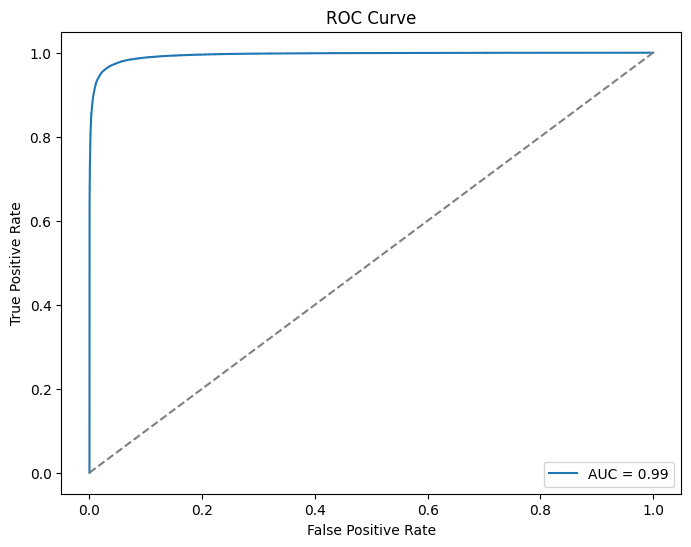

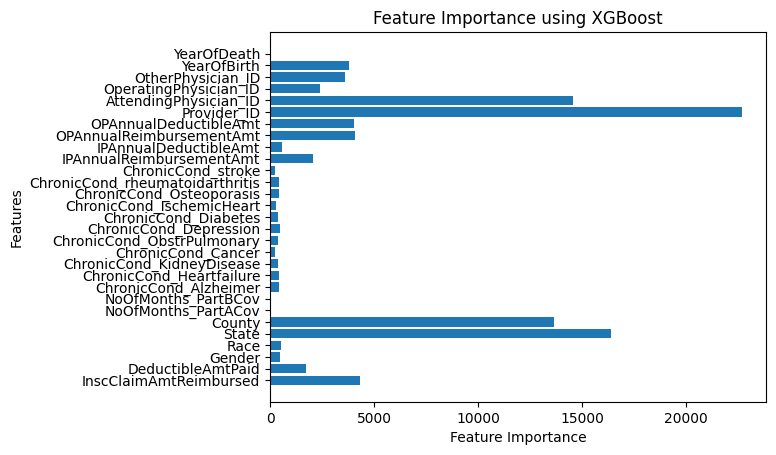

Best Parameters for the final model:
{'n_estimators': 395, 'max_depth': 9, 'learning_rate': 0.08874342426745108, 'subsample': 0.8842381065332388, 'colsample_bytree': 0.9458211801085953, 'gamma': 0.002001783208923768, 'reg_alpha': 0.03165895820271799, 'reg_lambda': 0.0014565349443120736}


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb
import optuna  # For hyperparameter tuning


# Convert all elements in the DataFrame to numeric
data = data.apply(pd.to_numeric)

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['PotentialFraud'])  # Features
y = data['PotentialFraud']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),  # Number of trees
        'max_depth': trial.suggest_int('max_depth', 3, 10),          # Maximum tree depth
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),  # Step size
        'subsample': trial.suggest_uniform('subsample', 0.7, 1.0),              # Fraction of samples
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.7, 1.0), # Fraction of features
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1e-1),       # Minimum loss reduction
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 1e-1), # L1 regularization
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 1e1) # L2 regularization
    }

    # Initialize the XGBoost classifier with the current set of parameters
    model = xgb.XGBClassifier(**param, eval_metric="logloss", use_label_encoder=False, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    predictions = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  # Number of trials for hyperparameter tuning

# Get the best parameters from the study
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best parameters
best_model = xgb.XGBClassifier(**best_params, eval_metric="logloss", use_label_encoder=False, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Final Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)

# Calculate log loss
log_loss_value = log_loss(y_test, y_pred_prob)
print("Final Log Loss:", log_loss_value)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
feature_importances = best_model.get_booster().get_score(importance_type='weight')
plt.barh(list(feature_importances.keys()), feature_importances.values())
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance using XGBoost')
plt.show()

# Displaying the best parameters used for the final model
print("Best Parameters for the final model:")
print(best_params)


In [62]:
best_model

e:\Sailu BTECH\4-2_project\1.fraud medical insurance\insurance\aws\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9458211801085953, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.002001783208923768, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08874342426745108, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=395, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [63]:
dump(best_model, 'xgboost.joblib')

['xgboost.joblib']